In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("/content/CarPrice_Assignment.csv")
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [ ]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
car_ID,205.0,NaN,NaN,NaN,103.0,59.322565,1.0,52.0,103.0,154.0,205.0
symboling,205.0,NaN,NaN,NaN,0.834146,1.245307,-2.0,0.0,1.0,2.0,3.0
CarName,205,147,toyota corona,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fueltype,205,2,gas,185,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aspiration,205,2,std,168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
doornumber,205,2,four,115,NaN,NaN,NaN,NaN,NaN,NaN,NaN
carbody,205,5,sedan,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
drivewheel,205,3,fwd,120,NaN,NaN,NaN,NaN,NaN,NaN,NaN
enginelocation,205,2,front,202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wheelbase,205.0,NaN,NaN,NaN,98.756585,6.021776,86.6,94.5,97.0,102.4,120.9


In [ ]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [ ]:
df.nunique()


car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [ ]:
categorical_columns = ['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype',
    'cylindernumber',
    'fuelsystem'
]

for col in categorical_columns:

    print(f"{col} : {df[col].unique()}")

fueltype : ['gas' 'diesel']
aspiration : ['std' 'turbo']
doornumber : ['two' 'four']
carbody : ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drivewheel : ['rwd' 'fwd' '4wd']
enginelocation : ['front' 'rear']
enginetype : ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
cylindernumber : ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
fuelsystem : ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


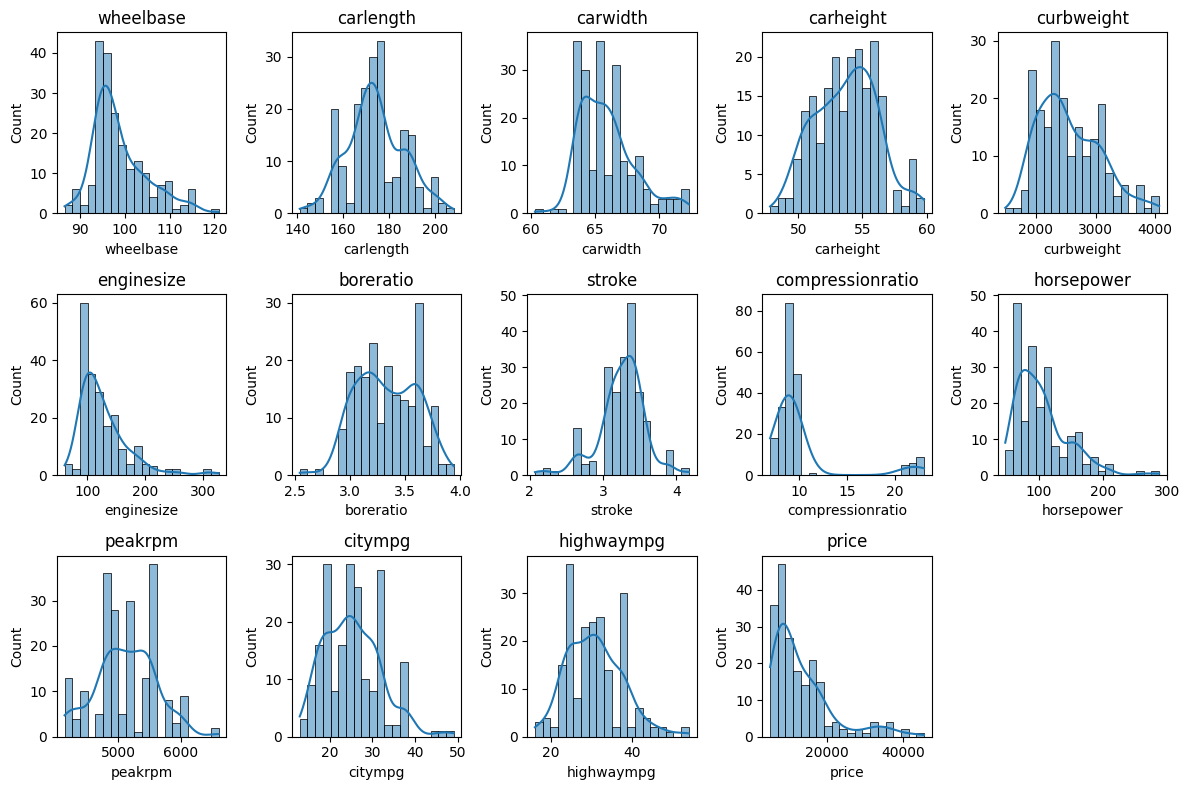

In [ ]:
numerical_features = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
                      'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
                      'peakrpm', 'citympg', 'highwaympg', 'price']

plt.figure(figsize=(12, 8))
for feature in numerical_features:
    plt.subplot(3, 5, numerical_features.index(feature) + 1)
    sns.histplot(data=df[feature], bins=20 , kde= True )
    plt.title(feature)
plt.tight_layout()
plt.show()

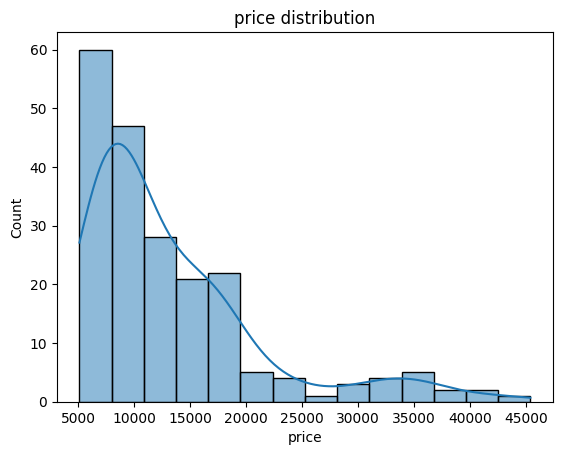

In [ ]:
sns.histplot(data=df["price"],kde=True )
plt.title("price distribution")
plt.show()


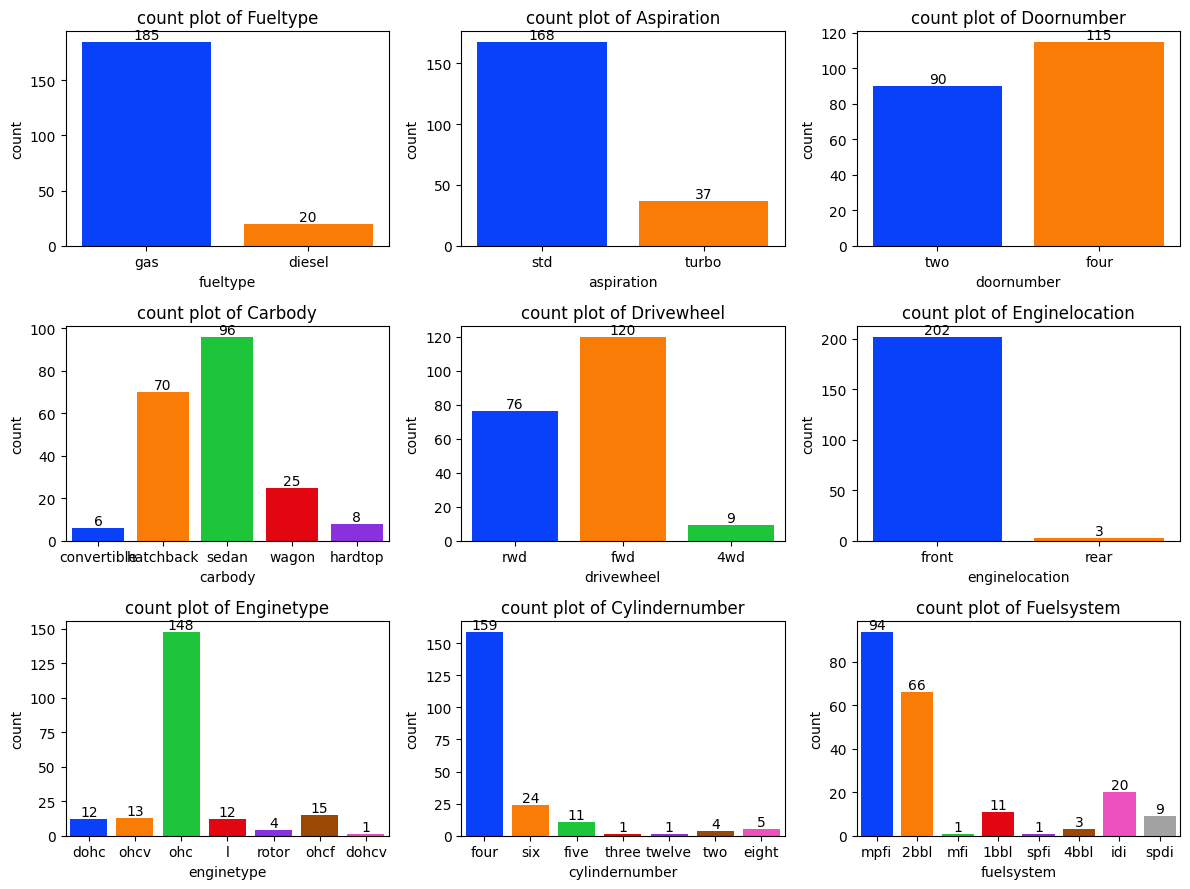

In [ ]:
  categorical_columns = ['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype',
    'cylindernumber','fuelsystem']

fig,axes = plt.subplots(nrows=3,ncols=3,figsize=(12,9))
axes = axes.ravel()

for i, col in enumerate(categorical_columns):
  sns.countplot(x=df[col],data = df  , palette="bright", saturation= 0.95 , ax=axes[i])
  for container in axes[i].containers:
     axes[i].bar_label( container, color='black' , size="10")
  axes[i].set_title (f'count plot of {col.capitalize()}')
  axes[i].set_ylabel('count')



plt.tight_layout ()
plt.show()





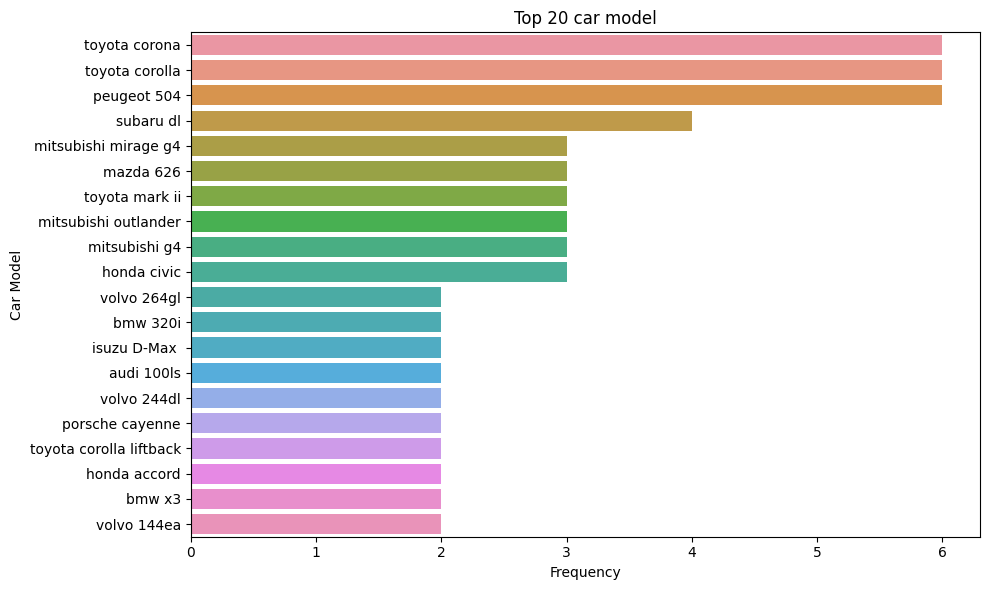

In [ ]:
n = 20

top_models=df["CarName"].value_counts().head(n)

plt.figure(figsize=(10,6))
sns.barplot(x= top_models.values, y= top_models.index)
plt.title(f'Top {n} car model')
plt.xlabel("Frequency")
plt.ylabel("Car Model")
plt.tight_layout()
plt.show()

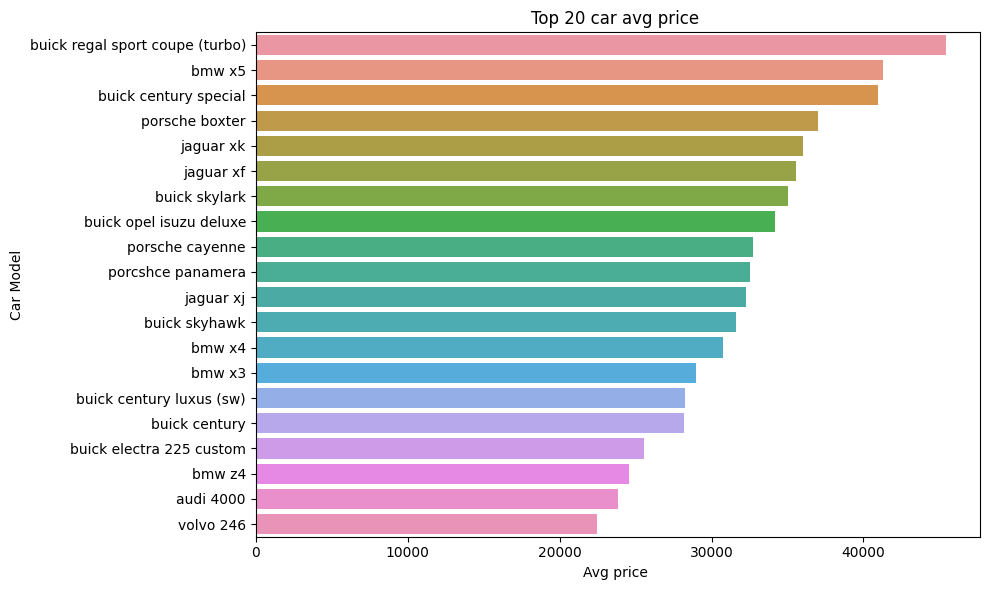

In [ ]:
avg_price_car = df.groupby("CarName")['price'].mean().sort_values(ascending = False )


n=20
top_models = avg_price_car.head(n)
plt.figure(figsize=(10,6))
sns.barplot(x= top_models.values, y= top_models.index)
plt.title(f'Top {n} car avg price ')
plt.xlabel("Avg price ")
plt.ylabel("Car Model")
plt.tight_layout()
plt.show()


In [ ]:
# Extract brand and model from CarName
df['brand'] = df['CarName'].apply(lambda x: x.split(' ')[0])
df['model'] = df['CarName'].apply(lambda x: ' '.join(x.split(' ')[1:]))

# Define categorical and numerical columns
categorical_columns = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
                       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'brand', 'model']
numerical_columns = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
                     'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
                     'peakrpm', 'citympg', 'highwaympg']

# Encoding categorical variables
label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Feature engineering
df['power_to_weight_ratio'] = df['horsepower'] / df['curbweight']
for column in numerical_columns:
    df[f'{column}_squared'] = df[column] ** 2
df['log_enginesize'] = np.log(df['enginesize'] + 1)

# Feature scaling
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [ ]:
df["CarName"]

0            alfa-romero giulia
1           alfa-romero stelvio
2      alfa-romero Quadrifoglio
3                   audi 100 ls
4                    audi 100ls
                 ...           
200             volvo 145e (sw)
201                 volvo 144ea
202                 volvo 244dl
203                   volvo 246
204                 volvo 264gl
Name: CarName, Length: 205, dtype: object

In [ ]:
df['brand'] = df['CarName'].apply(lambda x: x.split(' ')[0])
df['model'] = df['CarName'].apply(lambda x: ' '.join(x.split(' ')[1:]))

In [ ]:
df['brand']


0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: brand, Length: 205, dtype: object

In [ ]:
df['model']

0            giulia
1           stelvio
2      Quadrifoglio
3            100 ls
4             100ls
           ...     
200       145e (sw)
201           144ea
202           244dl
203             246
204           264gl
Name: model, Length: 205, dtype: object

In [ ]:
X = df.drop(['CarName','price'],axis=1)
y=df['price']
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2 , random_state=50)

model = LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2_square = r2_score(y_test,y_pred)
print(f" R-squared: {r2_square}")
print(f'Mean Squared Error: {mse}')



 R-squared: 0.8633221303576254
Mean Squared Error: 6300667.968130491


In [ ]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
113,16695.0,17894.378229,-1199.378229
170,11199.0,13812.636832,-2613.636832
12,20970.0,18105.450160,2864.549840
73,40960.0,43978.038514,-3018.038514
145,11259.0,11082.153804,176.846196
20,6575.0,7497.187553,-922.187553
107,11900.0,16507.660151,-4607.660151
8,23875.0,20516.659658,3358.340342
39,8845.0,10609.792854,-1764.792854
89,5499.0,15833.234763,-10334.234763
